## Coupon_detail & Coupon_area & prefecture_locations

In [1]:
from ml_config import *

In [2]:
coupon_area_test = pd.read_csv('../data/coupon_area_test.csv')
coupon_area_train = pd.read_csv('../data/coupon_area_train.csv')
coupon_detail_train = pd.read_csv('../data/coupon_detail_train.csv')
coupon_list_test = pd.read_csv('../data/coupon_list_test.csv')
coupon_list_train = pd.read_csv('../data/coupon_list_train.csv')
coupon_visit_train = pd.read_csv('../data/coupon_visit_train.csv')
prefecture_locations = pd.read_csv('../data/prefecture_locations.csv')
sample_submission = pd.read_csv('../data/sample_submission.csv')
user_list = pd.read_csv('../data/user_list.csv')

In [3]:
merge1 = pd.merge(coupon_detail_train, coupon_area_train, )
merge2 = pd.merge(merge1, prefecture_locations)
# merge3 = pd.merge(merge2, coupon_visit_train)
merge2

,ITEM_COUNT,I_DATE,SMALL_AREA_NAME,PURCHASEID_hash,USER_ID_hash,COUPON_ID_hash,PREF_NAME,PREFECTUAL_OFFICE,LATITUDE,LONGITUDE
0,1,2012-03-28 15:06,Hyogo,c820a8882374a4e472f0984a8825893f,d9dca3cb44bab12ba313eaa681f663eb,34c48f84026e08355dc3bd19b427f09a,Hyogo Prefecture,Kobe,34.691279,135.183025
1,1,2012-03-27 21:36,Hyogo,d0490ef4692fd3301cde19cdcb44cf34,562b5aaff8b75096a9bd1264afbba82f,34c48f84026e08355dc3bd19b427f09a,Hyogo Prefecture,Kobe,34.691279,135.183025
2,1,2012-03-30 11:33,Hyogo,532771307b2c63c48b587cd55d3fae55,fcc0e3b7578717970ef9c1094b81551f,34c48f84026e08355dc3bd19b427f09a,Hyogo Prefecture,Kobe,34.691279,135.183025
3,1,2012-03-29 11:27,Hyogo,ce63e905d399938c2b24ca19e5160a98,d177c1b057b0af075b3582315da94959,34c48f84026e08355dc3bd19b427f09a,Hyogo Prefecture,Kobe,34.691279,135.183025
4,1,2012-03-29 1:30,Hyogo,461a686b0d63147df049c210af7625b5,eb8c8696d862891f80485e68d754817f,34c48f84026e08355dc3bd19b427f09a,Hyogo Prefecture,Kobe,34.691279,135.183025
5,1,2012-03-30 0:46,Hyogo,cc1ef3ca3da915e56bad5be675447897,de744c5327f5380e117614ccdacbbd35,34c48f84026e08355dc3bd19b427f09a,Hyogo Prefecture,Kobe,34.691279,135.183025
6,3,2012-03-26 12:28,Hyogo,53eeccc12d18645e126201b4942e2eee,7b775ad4772cf5ec9cbe9add131e63e5,34c48f84026e08355dc3bd19b427f09a,Hyogo Prefecture,Kobe,34.691279,135.183025
7,1,2012-03-27 20:00,Hyogo,a43629adf7381ae7f581dca547fbe7c8,588c19e0392a5799341f6c435654afc2,34c48f84026e08355dc3bd19b427f09a,Hyogo Prefecture,Kobe,34.691279,135.183025
8,2,2012-03-28 9:13,Hyogo,8b5c354370ee538645c0176797fd6dd3,b87d6781e1bf86028a7c88925bdae56e,34c48f84026e08355dc3bd19b427f09a,Hyogo Prefecture,Kobe,34.691279,135.183025
9,1,2012-03-27 11:32,Hyogo,3e33b58637468cd09bbe6cef5f28da03,f80b994af67419e6481e92c11191bee6,34c48f84026e08355dc3bd19b427f09a,Hyogo Prefecture,Kobe,34.691279,135.183025


In [4]:
PREF_NAME_TEXT = merge2.groupby("PREF_NAME").size().reset_index(name='counts')
PREF_NAME_TEXT = PREF_NAME_TEXT.sort_values(by=['counts'], ascending=False)
PREF_NAME_TEXT = PREF_NAME_TEXT.reset_index(drop=True)
PREF_NAME_TEXT.head()

,PREF_NAME,counts
0,Tokyo,72325
1,Osaka prefecture,19805
2,Kanagawa Prefecture,10092
3,Hokkaido,5308
4,Fukuoka Prefecture,5240


In [5]:
merge3 = pd.merge(prefecture_locations, PREF_NAME_TEXT)
merge3.head()

,PREF_NAME,PREFECTUAL_OFFICE,LATITUDE,LONGITUDE,counts
0,Hokkaido,Sapporo,43.063968,141.347899,5308
1,Aomori Prefecture,Aomori,40.824623,140.740593,1093
2,Iwate Prefecture,Morioka,39.703531,141.152667,876
3,Miyagi Prefecture,Sendai,38.268839,140.872103,1340
4,Akita,Akita,39.718600,140.102334,1077


In [6]:
longitude = list(merge3['LONGITUDE'])
latitude = list(merge3['LATITUDE'])
counts = list(merge3['counts']/10)

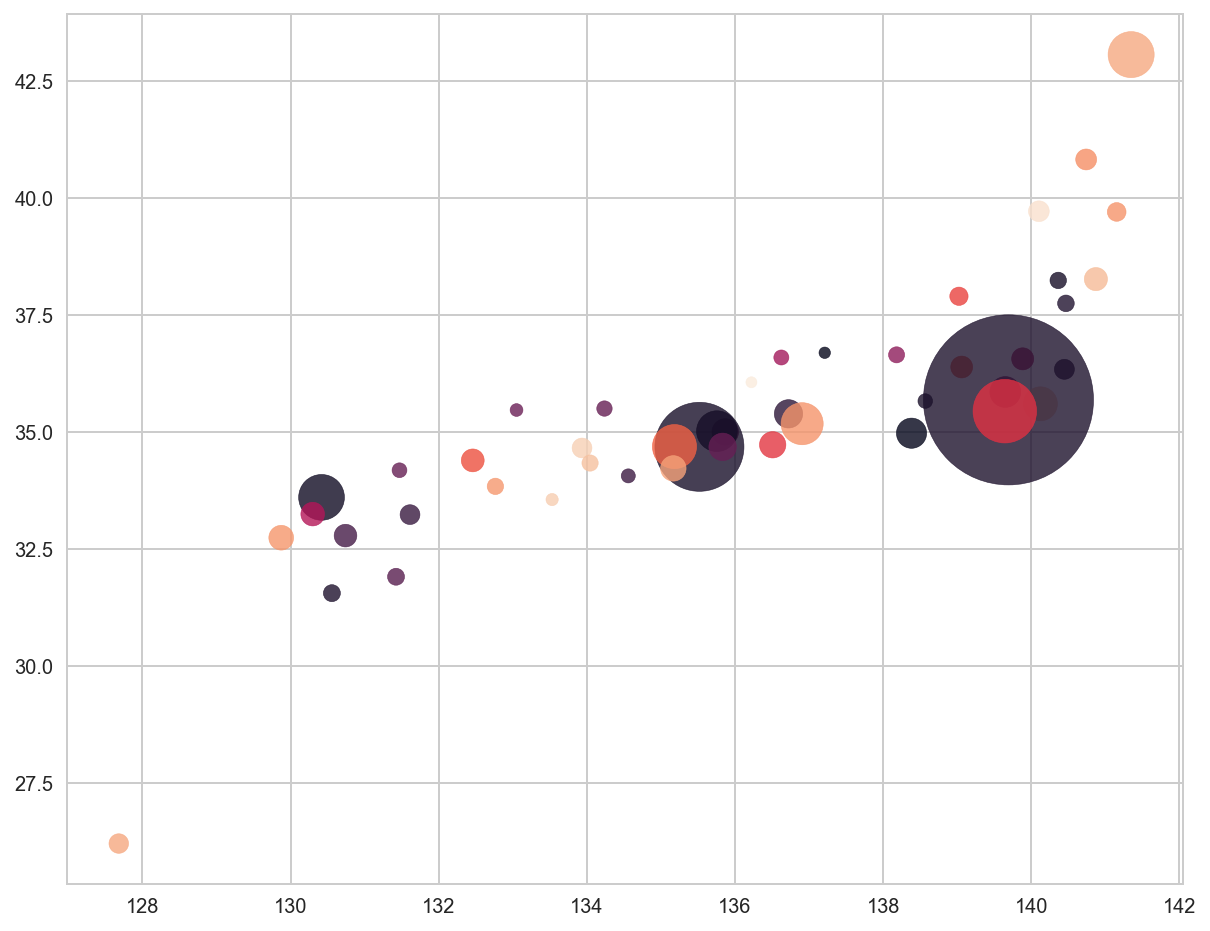

In [7]:
plt.figure(figsize = (10, 8))
plt.scatter(longitude, latitude, c = np.random.rand(47), alpha = 0.8, s = counts)
plt.show()